In [1]:
import sys;
sys.path.append('/home/haotruong/Receipt/rece_digi/text-detection-ctpn')
sys.path.append('/home/haotruong/Receipt/EasyOCR')

In [14]:
import notebook_utils as nutils
import numpy as np

import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import numpy as np
import cv2
import shapely
from shapely.geometry import Polygon
from pathlib import Path

import requests

In [3]:
import easyocr
reader = easyocr.Reader(['en'], gpu=True)

In [4]:
source_folder = Path('datasets/ReceiptCOOPData_v0.1')
images = utils.list_files(source_folder, '*.jpg')
# label_file = source_folder / (images[0].stem + '.txt')

In [37]:
file = images[0]
im = cv2.imread(str(file))

In [24]:
def draw_box_easyocr(result, img):
    image = img.copy()
    # result = np.array(result)
    for i, box in enumerate(result):
        draw_imag = cv2.polylines(image, [np.array(box[0]).astype(np.int32).reshape((-1, 1, 2))],True, (0,0,255) ,thickness=2)

        draw_imag = cv2.putText(draw_imag, str(i), (np.array(box[0][0][0]).astype(np.int32), np.array(box[0][0][1]).astype(np.int32) - 10) , cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), thickness =1,lineType=cv2.LINE_AA) 
    nutils.imshow(draw_imag, 15)

In [36]:
import os

In [115]:
for index, file in enumerate(images[index:]):
    
    im = cv2.imread(str(file))
    
    result = reader.readtext(im, batch_size=10, contrast_ths=0.15, slope_ths=0.3, width_ths=1)
    
    name = file.stem

    if not Path("datasets/Coop_export/cropped/{}".format(name)).is_dir():
        os.mkdir("datasets/Coop_export/cropped/{}".format(name))
        
    cv2.imwrite("datasets/Coop_export/full_image/{}.jpg".format(name), im)

    write_label_text = []

    for info in result:
        bbox = info[0]
        text = info[1]
        score = info[2]

        bbox_text = ",".join([str(int(p)) for p in np.ndarray.flatten(np.array(bbox)).tolist()])
        info_text = bbox_text + "," + text

        write_label_text.append(info_text)
        with open("datasets/Coop_export/full_image/{}.txt".format(name), "w") as f:
            for line in write_label_text:
                f.writelines(line+ "\r\n")

        
        cropped_im = im[int(bbox[0][1]) : int(bbox[2][1]), int(bbox[0][0]) : int(bbox[2][0])]
        if cropped_im.size !=0:
            cv2.imwrite("datasets/Coop_export/cropped/{}/{}.jpg".format(name, text), cropped_im)

0

In [91]:
bbox[2][1] , bbox[0][1] , bbox[2][0] , bbox[0][0]

(77, 0, 1671, 1273)

In [96]:
cropped_im = im[bbox[0][1] : bbox[2][1], bbox[0][0] : bbox[2][0]]
cropped_im

array([[[233, 242, 246],
        [234, 243, 246],
        [234, 243, 246],
        ...,
        [231, 242, 246],
        [231, 242, 246],
        [230, 241, 245]],

       [[233, 242, 246],
        [234, 243, 246],
        [234, 243, 246],
        ...,
        [231, 242, 246],
        [231, 242, 246],
        [230, 241, 245]],

       [[233, 242, 246],
        [234, 243, 246],
        [234, 243, 246],
        ...,
        [230, 241, 245],
        [230, 241, 245],
        [230, 241, 245]],

       ...,

       [[232, 240, 247],
        [230, 238, 245],
        [230, 238, 245],
        ...,
        [234, 243, 247],
        [233, 242, 246],
        [235, 241, 246]],

       [[231, 239, 246],
        [230, 238, 245],
        [230, 238, 245],
        ...,
        [234, 243, 247],
        [233, 242, 246],
        [235, 241, 246]],

       [[231, 239, 246],
        [230, 238, 245],
        [229, 237, 244],
        ...,
        [236, 242, 247],
        [235, 241, 246],
        [235, 241, 246]]

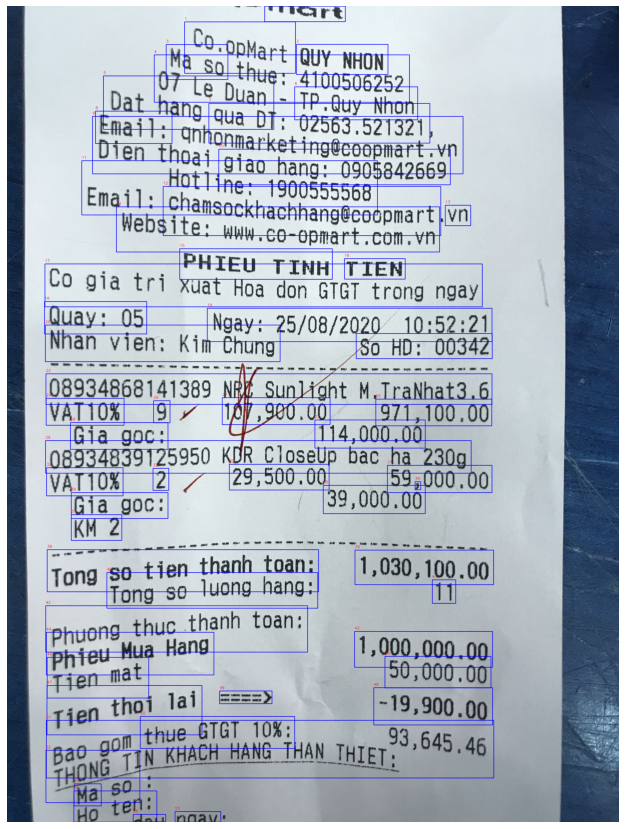

In [82]:
draw_box_easyocr(result, im)

In [49]:
for im in images:
    abc = cv2.imread(str(im))
    
    cv2.imwrite(str(Path('datasets/ReceiptCOOPData_v0.1_image') / im.name), abc)

In [23]:
import requests

In [41]:
url = 'http://0.0.0.0:8770/detect'

for im in images:
    files = {'image': open(str(im.absolute()), 'rb')}
    requests.post(url, files=files)